# Fokker–Planck equation Part 2

### Fokker-Planck equation is a partial differential equation that describes the evolution of a probability density function for a stochastic process. While it can be applied to many different types of systems, in finance it is often used to model the diffusion of stock prices.  

https://en.wikipedia.org/wiki/Fokker%E2%80%93Planck_equation  

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np

import matplotlib.pyplot as plt

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# Define the stock symbol and time period
symbol = "AAPL"
start_date = "2023-01-01"
end_date = "2023-02-01"


In [3]:
# Retrieve the historical data for the stock
df = yf.download(symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.879326,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,126.167366,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.829399,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,129.422394,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.951584,70790800


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-25,140.889999,142.429993,138.809998,141.860001,141.643738,65799300
2023-01-26,143.169998,144.250000,141.899994,143.960007,143.740540,54105100
2023-01-27,143.160004,147.229996,143.080002,145.929993,145.707520,70555800
2023-01-30,144.960007,145.550003,142.850006,143.000000,142.781998,64015300
2023-01-31,142.699997,144.339996,142.279999,144.289993,144.070023,65874500


In [6]:
# Calculate the daily returns and log returns
returns = np.log(df['Adj Close']/df['Adj Close'].shift(1)).dropna()

In [7]:
# Estimate the drift and volatility parameters using the mean and standard deviation of the daily returns
mu = returns.mean()
sigma = returns.std()

In [8]:
# Define the parameters of the Fokker-Planck equation
dt = 1/252 # time step
n_steps = 252 # number of steps
x0 = df['Adj Close'].iloc[-1] # initial stock price
n_simulations = 10000 # number of simulations

In [9]:
# Generate random numbers using the normal distribution and simulate the stock price process:
s = np.zeros((n_steps, n_simulations))
s[0,:] = x0
for i in range(1, n_steps):
    z = np.random.normal(size=n_simulations)
    s[i,:] = s[i-1,:] * np.exp((mu - 0.5*sigma**2)*dt + sigma*np.sqrt(dt)*z)

In [10]:
# Calculate the probability density function using the histogram method
n_bins = 50 # number of bins
hist, bins = np.histogram(s[-1,:], bins=n_bins, density=True)
x = 0.5*(bins[1:]+bins[:-1])

In [11]:
# Apply the Fokker-Planck equation to estimate the probability density function
gamma = -mu/sigma**2
eta = 0.5/sigma**2
pdf = np.sqrt(gamma/(2*np.pi*eta)) * np.exp(-gamma*(x-x0)/eta) * np.exp(-0.5*(gamma/eta)*(x-x0)**2)

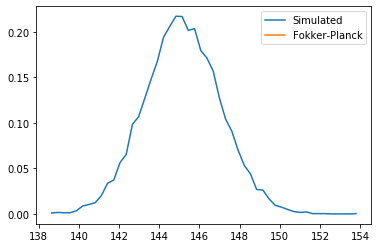

In [12]:
# Plot the simulated stock prices
plt.plot(x, hist, label='Simulated')
plt.plot(x, pdf, label='Fokker-Planck')
plt.legend()
plt.show()